In [1]:
import pandas as pd
import numpy as np
import sqlite3
import csv
import openpyxl
import adawat.adaat as ad
from collections import Counter

In [3]:
conn = sqlite3.connect('C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/arramooz-master/data/arabicdictionary.sqlite')
cursor = conn.cursor()

# Misalnya, kita mengambil kolom-kolom penting
cursor.execute("SELECT id, unvocalized, vocalized, root, normalized , triliteral, past, future, imperative, passive FROM verbs")
data = cursor.fetchall()

# Menutup koneksi database setelah selesai mengambil data
conn.close()
with open('C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/arabic_verbs_dataset.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)

    # Tulis header kolom sesuai dengan nama kolom yang diambil
    writer.writerow(['ID', 'Unvocalized', 'Vocalized', 'Root', 'Normalized' ,'Triliteral', 'Past', 'Future', 'Imperative', 'Passive'])

    # Tulis setiap baris data ke file CSV
    for row in data:
        writer.writerow(row)

print("Data berhasil disimpan ke output/arabic_verbs_dataset.csv")

Data berhasil disimpan ke output/arabic_verbs_dataset.csv


In [4]:
conn = sqlite3.connect('C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/arramooz-master/data/arabicdictionary.sqlite')
cursor = conn.cursor()

# Misalnya, kita mengambil kolom-kolom penting
cursor.execute("SELECT id, unvocalized, vocalized, wordtype ,root, wazn, normalized , stamped,category, original, mankous, defined, gender, feminin,masculin,number,single,dualable,feminable,masculin_plural,feminin_plural,broken_plural,mamnou3_sarf,relative,w_suffix,hm_suffix,kal_prefix,ha_suffix,k_prefix,annex,definition,note FROM nouns")
data = cursor.fetchall()

# Menutup koneksi database setelah selesai mengambil data
conn.close()
with open('C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/arabic_nouns_dataset.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)

    # Tulis header kolom sesuai dengan nama kolom yang diambil
    writer.writerow(['ID', 'unvocalized', 'vocalized', 'wordtype' , 'root', 'wazn', 'normalized' , 'stamped','category' , 'original', 'mankous', 'defined', 'gender', 'feminin','masculin','number','single','dualable','feminable','masculin_plural','feminin_plural','broken_plural','mamnou3_sarf','relative','w_suffix','hm_suffix','kal_prefix','ha_suffix','k_prefix','annex','definition','note'])

    # Tulis setiap baris data ke file CSV
    for row in data:
        writer.writerow(row)

print("Data berhasil disimpan ke output/arabic_nouns_dataset.csv")

Data berhasil disimpan ke output/arabic_nouns_dataset.csv


Data preprocessing dataset verbs

In [3]:
file_path = 'C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master'  # Sesuaikan dengan path yang benar

# Membaca file CSV dan menampilkannya sebagai DataFrame
df_verbs = pd.read_csv(file_path +'/arabic_verbs_dataset.csv', encoding='utf-8')
df_verbs.head()

ID Unvocalized    Vocalized Root Normalized  Triliteral  Past  Future  \
0   1        أمكن      أمْكَنَ  مكن       ءمكن           0     0       0   
1   2      استحال  اِسْتَحَالَ  حيل     استحال           0     0       0   
2   3         زها        زَهَا  زهو        زها           1     0       0   
3   4         بئس       بِئْسَ  بأس        بءس           1     0       0   
4   5        أغمى      أَغْمَى  غمي       ءغمى           0     0       0   

   Imperative  Passive  
0           0        0  
1           0        0  
2           0        1  
3           0        0  
4           0        1

In [4]:
# Isi nilai kosong
df_verbs.fillna('unknown', inplace=True)


In [5]:
# Ganti nama kolom jika diperlukan
df_verbs.rename(columns={
    'Unvocalized': 'unvocalized', 
    'Vocalized': 'vocalized',
    'Root': 'root',
    'Normalized': 'normalized',
    'Triliteral':'triliteral',
    'Past':'past',
    'Future':'future',
    'Imperative':'imperative',
    'Passive':'passive'
}, inplace=True)


In [5]:
df_verbs.head()

ID unvocalized    vocalized root normalized  triliteral  past  future  \
0   1        أمكن      أمْكَنَ  مكن       ءمكن           0     0       0   
1   2      استحال  اِسْتَحَالَ  حيل     استحال           0     0       0   
2   3         زها        زَهَا  زهو        زها           1     0       0   
3   4         بئس       بِئْسَ  بأس        بءس           1     0       0   
4   5        أغمى      أَغْمَى  غمي       ءغمى           0     0       0   

   imperative  passive  
0           0        0  
1           0        0  
2           0        1  
3           0        0  
4           0        1

In [6]:
file_path = r"C:\Users\dzak\Documents\SERTIFIKAT BANGKIT 24\projek capstone\HasilGenerateUnique\arabicmorph.xlsx"

# Membaca file CSV dan menampilkannya sebagai DataFrame
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.head()

Unnamed: 0         Arabic     Buckwalter       Pattern     Root  \
0           0     مَظْلُوْمٌ     maZoluwomN     ma|ouwoN|  Zlm/ظلم   
1           1        ظَالِمٌ        ZaAlimN        |aAiN|  Zlm/ظلم   
2           2       يَظْلِمُ       yaZolimu       ya|oiu|  Zlm/ظلم   
3           3         ظَلَمَ         Zalama         |aaa|  Zlm/ظلم   
4           4  مَظْلُوْمَانِ  maZoluwomaAni  ma|ouwoa|Ani  Zlm/ظلم   

                                     Vector Wazan  WazanIndex  \
0    29, 17.0, 7.0, 23.0, 9.0, 24.0, 8.0, 1   Iai          10   
1    1, 17.0, 4.0, 23.0, 15.0, 24.0, 8.0, 1   Iai          10   
2  35, 17.0, 7.0, 23.0, 15.0, 24.0, 12.0, 1   Iai          10   
3    1, 17.0, 5.0, 23.0, 14.0, 24.0, 9.0, 1   Iai          10   
4   29, 17.0, 7.0, 23.0, 9.0, 24.0, 9.0, 16   Iai          10   

        Type of Word Dhamir                                                MSD  
0  اِسِمْ مَفْعُوْلْ   هُوَ  {"POS": "N", "NUM": "SG", "GEN": "MASC", "Verb...  
1     اِسِمْ فَاعِلْ   هُوَ  {"POS": "N", "NUM": "SG", "GEN": "MASC", "Verb...  
2   فِعِلْ مُضَارِعْ   هُوَ  {"POS": "V", "aspect": "IPFV", "tense": "PRS/F...  
3       فِعِلْ مَاضِ   هُوَ  {"POS": "V", "aspect": "PFV", "tense": "PST", ...  
4  اِسِمْ مَفْعُوْلْ  هُمَا      {"POS": "N", "NUM": "DU", "Verb Form": "Iai"}

In [7]:
columns_to_drop = ['Buckwalter', 'Vector', 'Pattern', 'MSD']
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df.head()

Unnamed: 0         Arabic     Root Wazan  WazanIndex       Type of Word  \
0           0     مَظْلُوْمٌ  Zlm/ظلم   Iai          10  اِسِمْ مَفْعُوْلْ   
1           1        ظَالِمٌ  Zlm/ظلم   Iai          10     اِسِمْ فَاعِلْ   
2           2       يَظْلِمُ  Zlm/ظلم   Iai          10   فِعِلْ مُضَارِعْ   
3           3         ظَلَمَ  Zlm/ظلم   Iai          10       فِعِلْ مَاضِ   
4           4  مَظْلُوْمَانِ  Zlm/ظلم   Iai          10  اِسِمْ مَفْعُوْلْ   

  Dhamir  
0   هُوَ  
1   هُوَ  
2   هُوَ  
3   هُوَ  
4  هُمَا

In [8]:
columns_to_drop = ['Wazan', 'WazanIndex']
df = df.drop(columns=columns_to_drop)
df.head()

Unnamed: 0         Arabic     Root       Type of Word Dhamir
0           0     مَظْلُوْمٌ  Zlm/ظلم  اِسِمْ مَفْعُوْلْ   هُوَ
1           1        ظَالِمٌ  Zlm/ظلم     اِسِمْ فَاعِلْ   هُوَ
2           2       يَظْلِمُ  Zlm/ظلم   فِعِلْ مُضَارِعْ   هُوَ
3           3         ظَلَمَ  Zlm/ظلم       فِعِلْ مَاضِ   هُوَ
4           4  مَظْلُوْمَانِ  Zlm/ظلم  اِسِمْ مَفْعُوْلْ  هُمَا

In [12]:
unique_values =df['Type of Word'].unique()
print("Unique values in 'Type of Word' column:", unique_values)
df['Type of Word'] = df['Type of Word'].str.strip()

Unique values in 'Type of Word' column: [nan]


AttributeError: Can only use .str accessor with string values!

In [13]:
type_mapping = {
    'فِعِلْ مَاضِ': 1,
    'فِعِلْ مُضَارِعْ': 2,
    'مَصْدَرْ': 3,
    'اِسِمْ فَاعِلْ': 4,
    'اِسِمْ مَفْعُوْلْ': 5,
    'فِعِلْ الأَمرْ': 6,
    'فِعِلْ النَهْيِ': 7
}

# Mengubah nilai pada kolom 'Type of Word'
df['Type of Word'] = df['Type of Word'].map(type_mapping)

# Tampilkan beberapa baris dari DataFrame setelah mapping
df

Unnamed: 0         Arabic     Root  Type of Word     Dhamir
0               0     مَظْلُوْمٌ  Zlm/ظلم           NaN       هُوَ
1               1        ظَالِمٌ  Zlm/ظلم           NaN       هُوَ
2               2       يَظْلِمُ  Zlm/ظلم           NaN       هُوَ
3               3         ظَلَمَ  Zlm/ظلم           NaN       هُوَ
4               4  مَظْلُوْمَانِ  Zlm/ظلم           NaN      هُمَا
...           ...            ...      ...           ...        ...
30931       30931    عَبَسْتُنَّ  Ebs/عبس           NaN  أَنْتُنَّ
30932       30932       أَعْبِسُ  Ebs/عبس           NaN      أَنَا
30933       30933       عَبَسْتُ  Ebs/عبس           NaN      أَنَا
30934       30934       نَعْبِسُ  Ebs/عبس           NaN     نَحْنُ
30935       30935      عَبَسْنَا  Ebs/عبس           NaN     نَحْنُ

[30936 rows x 5 columns]

In [44]:
import arramooz.arabicdictionary 
mydict = arramooz.arabicdictionary.ArabicDictionary('verbs')
wordlist = [u"استقلّ", u'استقل', u"كذب"]
tmp_list = []
for word in wordlist:
    foundlist = mydict.lookup(word)
    for word_tuple in foundlist:
        word_tuple = dict(word_tuple) 
        vocalized = word_tuple['vocalized']
        tmp_list.append(dict(word_tuple))
print(tmp_list)

[{'id': 4740, 'vocalized': 'اِسْتَقَلَّ', 'unvocalized': 'استقل', 'root': 'قلل', 'normalized': 'استقل', 'stamped': 'ستقل', 'future_type': 'فتحة', 'triliteral': 0, 'transitive': 1, 'double_trans': 0, 'think_trans': 1, 'unthink_trans': 0, 'reflexive_trans': 0, 'past': 1, 'future': 1, 'imperative': 1, 'passive': 1, 'future_moode': 1, 'confirmed': 1}, {'id': 118, 'vocalized': 'كَذَّبَ', 'unvocalized': 'كذب', 'root': 'كذب', 'normalized': 'كذب', 'stamped': 'كذب', 'future_type': 'فتحة', 'triliteral': 0, 'transitive': 1, 'double_trans': 0, 'think_trans': 1, 'unthink_trans': 0, 'reflexive_trans': 0, 'past': 1, 'future': 1, 'imperative': 1, 'passive': 1, 'future_moode': 1, 'confirmed': 1}, {'id': 10194, 'vocalized': 'كَذَبَ', 'unvocalized': 'كذب', 'root': 'كذب', 'normalized': 'كذب', 'stamped': 'كذب', 'future_type': 'كسرة', 'triliteral': 1, 'transitive': 1, 'double_trans': 0, 'think_trans': 1, 'unthink_trans': 0, 'reflexive_trans': 0, 'past': 1, 'future': 1, 'imperative': 1, 'passive': 1, 'future

# me-klasifikasikan kata kerja yang jamid dan musytaq

In [92]:
unvocalized_words = []
with open('arramooz-master/arabic_verbs_dataset.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in(reader):
        unvocalized_words.append(row['Unvocalized'])

        

In [93]:
df_verbs = pd.read_csv('arramooz-master/arabic_verbs_dataset.csv')
df_verbs = df_verbs.drop(columns=["Triliteral", "Past", "Future", "Imperative", "Passive"])
df_verbs.head()

ID Unvocalized    Vocalized Root Normalized
0   1        أمكن      أمْكَنَ  مكن       ءمكن
1   2      استحال  اِسْتَحَالَ  حيل     استحال
2   3         زها        زَهَا  زهو        زها
3   4         بئس       بِئْسَ  بأس        بءس
4   5        أغمى      أَغْمَى  غمي       ءغمى

In [94]:
lastmark = True
result = []
for word in unvocalized_words:
    result.extend(ad.full_stemmer(word, lastmark))
def check_verb_type(data):
    jamid = []
    musytaq = []
    for item in data:
        word_type = item.get('type', '')
        if 'جامد' in word_type:
            jamid.append(item['word'])
        elif '' in word_type:
            musytaq.append(item['word'])
        else:
            print(f"Kata '{item['word']}' tidak dapat dikategorikan.")
    return jamid, musytaq

# Panggil fungsi untuk memeriksa tipe kata kerja

def process_words(jamid,musytaq):
    jamid_count = Counter(jamid)
    musytaq_count = Counter(musytaq)

    all_words = set(jamid + musytaq)
    final_jamid = []
    final_musytaq = []

    for word in all_words:
       if word in musytaq_count and word not in jamid_count:
           final_musytaq.append(word)
       elif word in musytaq_count and word in jamid_count:
            if musytaq_count[word] > jamid_count[word]:
                final_musytaq.append(word)
            else:
                final_jamid.append(word)
       elif word in jamid_count and word not in musytaq_count:
            final_jamid.append(word)
    return final_jamid, final_musytaq

jamid, musytaq = check_verb_type(result)
final_jamid,final_musytaq = process_words(jamid, musytaq)



c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python31

In [95]:
df_verbs['jamid'] = df_verbs['Unvocalized'].apply(lambda x: 1 if x in final_jamid else 0)
df_verbs['musytaq'] = df_verbs['Unvocalized'].apply(lambda x: 1 if x in final_musytaq else 0)

# Display the updated DataFrame
df_verbs.head()

ID Unvocalized    Vocalized Root Normalized  jamid  musytaq
0   1        أمكن      أمْكَنَ  مكن       ءمكن      0        1
1   2      استحال  اِسْتَحَالَ  حيل     استحال      0        1
2   3         زها        زَهَا  زهو        زها      0        1
3   4         بئس       بِئْسَ  بأس        بءس      1        0
4   5        أغمى      أَغْمَى  غمي       ءغمى      0        1

In [112]:
df_verbs.rename(columns={
    'Unvocalized': 'unvocalized', 
    'Vocalized': 'vocalized',
    'Root': 'root',
    'Normalized': 'normalized'
}, inplace=True)
df_verbs = df_verbs.drop(columns=["ID"])
df_verbs.head()

unvocalized    vocalized root normalized  jamid  musytaq
0        أمكن      أمْكَنَ  مكن       ءمكن      0        1
1      استحال  اِسْتَحَالَ  حيل     استحال      0        1
2         زها        زَهَا  زهو        زها      0        1
3         بئس       بِئْسَ  بأس        بءس      1        0
4        أغمى      أَغْمَى  غمي       ءغمى      0        1

In [110]:
jumlah_jamid = df_verbs['jamid'].sum()
jumlah_musytaq = df_verbs['musytaq'].sum()

print(f"Jumlah kata jamid: {jumlah_jamid}")
print(f"Jumlah kata musytaq: {jumlah_musytaq}")

Jumlah kata jamid: 844
Jumlah kata musytaq: 9793


# Menambahkan Dataset menggunakan Dataset kata benda

In [101]:
df_nouns = pd.read_csv('arramooz-master/arabic_nouns_dataset.csv', encoding='utf-8')
columns_to_keep = ['unvocalized', 'vocalized', 'root', 'normalized']
df_nouns = df_nouns[columns_to_keep]
df_nouns.head()

C:\Users\dzak\AppData\Local\Temp\ipykernel_2956\1201963937.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nouns = pd.read_csv('arramooz-master/arabic_nouns_dataset.csv', encoding='utf-8')


unvocalized    vocalized root normalized
0        متخذ    مُتَّخِذٌ  ءخذ       متخذ
1       متأبط  مُتَأَبِّطٌ  أبط      متءبط
2         آتي         آتِي  أتي       ءاتي
3       أواتي     أَوَاتِي  أتي      ءواتي
4        مؤثر    مُؤَثِّرٌ  أثر       مءثر

In [102]:
missing_values = df_nouns[['unvocalized', 'vocalized', 'root', 'normalized']].isnull().sum()
print("Jumlah nilai kosong di setiap kolom:")
print(missing_values)
df_nouns_cleaned = df_nouns.dropna(subset=['unvocalized', 'vocalized', 'root', 'normalized'])
print("Jumlah baris setelah menghapus nilai kosong:", df_nouns_cleaned.isnull().sum())

Jumlah nilai kosong di setiap kolom:
unvocalized     14
vocalized       14
root           150
normalized      14
dtype: int64
Jumlah baris setelah menghapus nilai kosong: unvocalized    0
vocalized      0
root           0
normalized     0
dtype: int64


In [105]:
df_nouns_cleaned = df_nouns_cleaned.head(20000)
unvocalized_words = df_nouns_cleaned['unvocalized'].tolist()
unvocalized_words

['متخذ',
 'متأبط',
 'آتي',
 'أواتي',
 'مؤثر',
 'مستأثر',
 'متأثر',
 'آثم',
 'متأجج',
 'مؤجر',
 'مستأجر',
 'مؤجل',
 'مؤخر',
 'متأخر',
 'مؤدب',
 'متأدب',
 'مؤدي',
 'مؤذن',
 'مؤذي',
 'مؤارب',
 'مؤرخ',
 'مؤتزر',
 'مؤسس',
 'مؤسف',
 'آسف',
 'أواسف',
 'متأسف',
 'آسن',
 'مؤشر',
 'متأصل',
 'آفل',
 'أفل',
 'أفول',
 'متأقلم',
 'مؤكد',
 'متأكد',
 'مؤكسد',
 'متأكسد',
 'متآلف',
 'مؤلف',
 'مؤتلف',
 'متألق',
 'مؤلم',
 'آمر',
 'أوامر',
 'آمن',
 'أوامن',
 'مؤتمر',
 'متآمر',
 'متأمرك',
 'متأمل',
 'مؤمل',
 'مؤمن',
 'مؤنس',
 'مستأنف',
 'متأنق',
 'متأني',
 'متأهب',
 'مستأهل',
 'آهل',
 'أواهل',
 'متأهل',
 'متأوه',
 'مؤيد',
 'بائس',
 'بؤس',
 'بؤساء',
 'بوائس',
 'منبت',
 'بات',
 'بوائر',
 'باتر',
 'بواتر',
 'بتار',
 'بترة',
 'باث',
 'بواث',
 'مبخر',
 'بثثة',
 'باجح',
 'بواجح',
 'بجحة',
 'بجاح',
 'باحث',
 'بحاث',
 'بواحث',
 'بحثة',
 'متبتل',
 'منبث',
 'منبثق',
 'متبجح',
 'متباجح',
 'متباحث',
 'متبحر',
 'متبختر',
 'متبدل',
 'مبحر',
 'باخر',
 'متبخر',
 'باخس',
 'مبتدئ',
 'مبدئ',
 'بادئ',
 'بوادئ',
 'مستبد',
 'متب

In [106]:
lastmark = True
result = []
for word in unvocalized_words:
    result.extend(ad.full_stemmer(word, lastmark))

def check_noun_type(data):
    jamid = []
    musytaq = []
    for item in data:
        word_type = item.get('type', '')
        if 'جامد' in word_type:
            jamid.append(item['word'])
        elif '' in word_type:
            musytaq.append(item['word'])
        else:
            print(f"Kata '{item['word']}' tidak dapat dikategorikan.")
    return jamid, musytaq

def process_words_noun(jamid,musytaq):
    jamid_count = Counter(jamid)
    musytaq_count = Counter(musytaq)

    all_words = set(jamid + musytaq)
    final_jamid_noun = []
    final_musytaq_noun = []

    for word in all_words:
       if word in musytaq_count and word not in jamid_count:
           final_musytaq_noun.append(word)
       elif word in musytaq_count and word in jamid_count:
            if musytaq_count[word] > jamid_count[word]:
                final_musytaq_noun.append(word)
            else:
                final_jamid_noun.append(word)
       elif word in jamid_count and word not in musytaq_count:
            final_jamid_noun.append(word)
    return final_jamid_noun, final_musytaq_noun

jamid, musytaq = check_noun_type(result)
final_jamid_noun,final_musytaq_noun = process_words_noun(jamid, musytaq)

c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\qalsadi\cache_pickledb.py  Error: Can't Open data base  c:\Users\dzak\AppData\Local\Programs\Python\Python311\Lib\site-packages\adawat\../tmp\.qalsadiCache.pickledb
c:\Users\dzak\AppData\Local\Programs\Python\Python31

In [107]:
df_nouns_cleaned['jamid'] = df_nouns_cleaned['unvocalized'].apply(lambda x: 1 if x in final_jamid_noun else 0)
df_nouns_cleaned['musytaq'] = df_nouns_cleaned['unvocalized'].apply(lambda x: 1 if x in final_musytaq_noun else 0)
 
# Display the updated DataFrame
df_nouns_cleaned.head()

unvocalized    vocalized root normalized  jamid  musytaq
0        متخذ    مُتَّخِذٌ  ءخذ       متخذ      0        1
1       متأبط  مُتَأَبِّطٌ  أبط      متءبط      0        1
2         آتي         آتِي  أتي       ءاتي      0        1
3       أواتي     أَوَاتِي  أتي      ءواتي      0        1
4        مؤثر    مُؤَثِّرٌ  أثر       مءثر      0        1

In [108]:
jumlah_jamid = df_nouns_cleaned['jamid'].sum()
jumlah_musytaq = df_nouns_cleaned['musytaq'].sum()

print(f"Jumlah kata jamid: {jumlah_jamid}")
print(f"Jumlah kata musytaq: {jumlah_musytaq}")

Jumlah kata jamid: 9069
Jumlah kata musytaq: 10928


# Gabungkan kedua dataframe

In [113]:
df_nouns_cleaned_filtered = df_nouns_cleaned[df_nouns_cleaned['jamid'] == 1]
df_combined = pd.concat([df_verbs, df_nouns_cleaned_filtered], axis=0, ignore_index=True)
df_combined.head()


unvocalized    vocalized root normalized  jamid  musytaq
0        أمكن      أمْكَنَ  مكن       ءمكن      0        1
1      استحال  اِسْتَحَالَ  حيل     استحال      0        1
2         زها        زَهَا  زهو        زها      0        1
3         بئس       بِئْسَ  بأس        بءس      1        0
4        أغمى      أَغْمَى  غمي       ءغمى      0        1

In [115]:
missing_values = df_combined[['unvocalized', 'vocalized', 'root', 'normalized','jamid', 'musytaq']].isnull().sum()
print("Jumlah nilai kosong di setiap kolom:")
print(missing_values)

jumlah_jamid = df_combined['jamid'].sum()
jumlah_musytaq = df_combined['musytaq'].sum()

print(f"Jumlah kata jamid: {jumlah_jamid}")
print(f"Jumlah kata musytaq: {jumlah_musytaq}")

Jumlah nilai kosong di setiap kolom:
unvocalized    0
vocalized      0
root           0
normalized     0
jamid          0
musytaq        0
dtype: int64
Jumlah kata jamid: 9913
Jumlah kata musytaq: 9793


In [116]:
output_path = 'C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/jamid_musytaq_vn.csv'
df_combined.to_csv(output_path, index=False, encoding='utf-8')

print(f"Data berhasil disimpan ke {output_path}")

Data berhasil disimpan ke C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/jamid_musytaq_vn.csv


# Preprocessing Data

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [3]:
# Menggabungkan kolom 'unvocalized' dan 'vocalized' sebagai fitur teks

file_path = 'C:/Users/dzak/Documents/SERTIFIKAT BANGKIT 24/projek capstone/arramooz-master/jamid_musytaq_vn.csv'
df = pd.read_csv(file_path, encoding='utf-8')
df['text'] = df['unvocalized'].fillna('') + ' ' + df['vocalized'].fillna('')

In [4]:

X = df['text']
y = df['jamid']  # Menggunakan kolom 'jamid' sebagai label (0 atau 1)

# Membagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan beberapa baris pertama dari set pelatihan dan set pengujian untuk memastikan pembagian berhasil
print("Set Pelatihan:")
print(X_train.head())
print(y_train.head())

print("\nSet Pengujian:")
print(X_test.head())
print(y_test.head())

Set Pelatihan:
6292             توقح تَوَقَّحَ
14735            بكارة بَكارَةٌ
3214                صدق صَدَّقَ
11583    سموريات سَمُّورِيَّاتٌ
8883                  جاح جَاحَ
Name: text, dtype: object
6292     0
14735    1
3214     0
11583    1
8883     0
Name: jamid, dtype: int64

Set Pengujian:
18581         ليث لَيْثٌ
5431       أوجف أَوْجَفَ
3143         سفط سَفَّطَ
14595    أراكة أَرَاكَةٌ
1730          شغر شَغَرَ
Name: text, dtype: object
18581    1
5431     0
3143     1
14595    1
1730     0
Name: jamid, dtype: int64


In [5]:
#Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [48]:
# Membangun model LSTM
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))

model.add(Bidirectional(LSTM(64, return_sequences=True,kernel_regularizer=l2(0.01))))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu')),
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ (None, 2, 128)         │     3,509,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (None, 2, 128)         │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_22                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,651,881 (13.93 MB)

 Trainable params: 3,651,497 (13.93 MB)

 Non-trainable params: 384 (1.50 KB)

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
history = model.fit(X_train_pad, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping,reduce_lr])

# Evaluasi model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Akurasi pada set pengujian: {accuracy}")


Epoch 1/50


395/395 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.5149 - loss: 3.3142 - val_accuracy: 0.5090 - val_loss: 1.0777 - learning_rate: 0.0010
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.8503 - loss: 0.6466 - val_accuracy: 0.6302 - val_loss: 0.7251 - learning_rate: 0.0010
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9425 - loss: 0.2288 - val_accuracy: 0.6470 - val_loss: 0.6506 - learning_rate: 0.0010
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9860 - loss: 0.0898 - val_accuracy: 0.6518 - val_loss: 0.6839 - learning_rate: 0.0010
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9964 - loss: 0.0385 - val_accuracy: 0.6400 - val_loss: 0.7557 - learning_rate: 0.0010
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.9974 - loss: 0.0311 - val_accuracy: 0.6546 - val_loss: 0.6809 - learning_rate: 2.0000e-04
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6362 - loss: 0.7533
Akurasi 

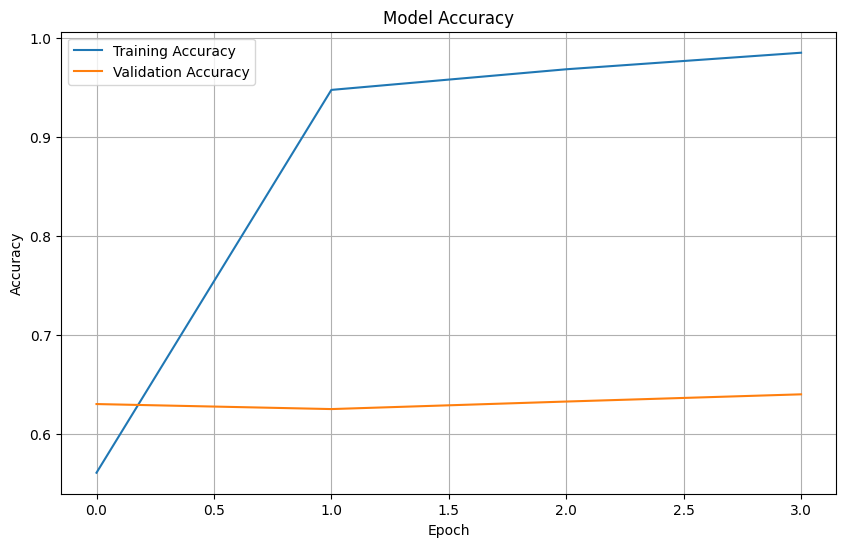

In [38]:
# Plot akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()